In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def drawKeyPts_thick(im,keyp,col,th):
    for curKey in keyp:
        x=int(curKey.pt[0])
        y=int(curKey.pt[1])
        size = int(curKey.size)
        cv2.circle(im,(x,y),size, col,thickness=th, lineType=8, shift=0)    
    return im  
    

### Question 3: SIFT Features and Matching

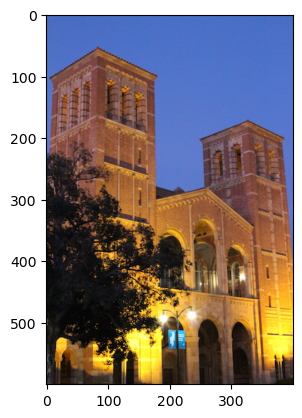

In [9]:
img1 = cv2.imread('./images/ucla/img1.JPG')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

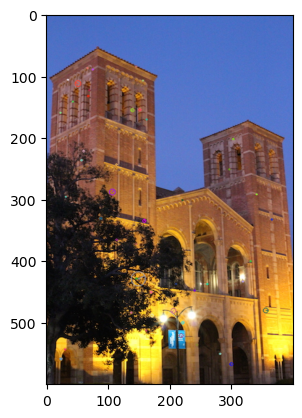

In [10]:
# Convert to grayscale image
I = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Compute the SIFT keypoints and descriptors
sift = cv2.SIFT_create()
kp, d = sift.detectAndCompute(I, None)

# Visualize 50 randomly selected keypoints
sel = np.random.choice(range(len(kp)), size=50, replace=False)
plt.imshow(cv2.drawKeypoints(img1, [kp[i] for i in sel], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)[:,:,::-1])

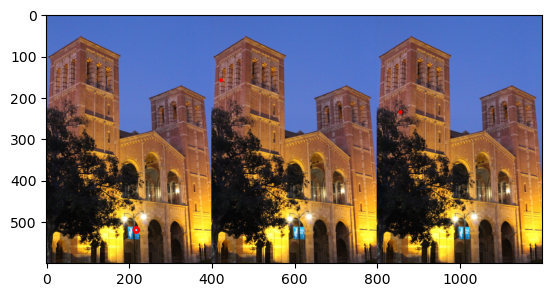

In [11]:
# Visualize specific keypoint positions
h3 = []
for i in sel[:3]: # here we use first three
    h3.append(drawKeyPts_thick(np.copy(img1), [kp[i]], (0,0,255), 5))
    # h3.append(cv2.drawKeypoints(img1, [kp[i]], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)[:,:,::-1])
plt.imshow(np.concatenate(h3, axis=1)[:,:,::-1])

### OpenCV Matching function

The result of matches = bf.match(des1,des2) line is a list of DMatch objects. This DMatch object has following attributes:

* DMatch.distance - Distance between descriptors. The lower, the better it is.
* DMatch.trainIdx - Index of the descriptor in train descriptors
* DMatch.queryIdx - Index of the descriptor in query descriptors
* DMatch.imgIdx - Index of the train image.

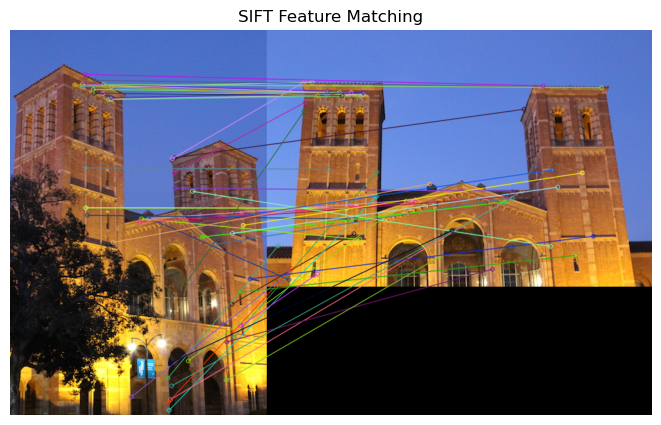

In [13]:
# TODO: Load the second image and calculate its descriptors
img2 = img2 = cv2.imread('./images/ucla/img2.JPG')#

# Convert to grayscale image
I2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)#

# TODO: Compute the SIFT keypoints and descriptors
sift =  cv2.SIFT_create() #
kp2, d2 = sift.detectAndCompute(I2, None)

I1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Compute the SIFT keypoints and descriptors for img1
kp1, d1 = sift.detectAndCompute(I1, None)
# For each SIFT descriptor in img1 find its correspondence in img2
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(d, d2)
matches = sorted(matches, key=lambda x: x.distance)

# TODO:Store the matched keypoints from both images; use kp[i].pt to find the location of the key point

X1 = np.array([kp1[m.queryIdx].pt for m in matches])
X2  =np.array([kp2[m.trainIdx].pt for m in matches]) 

# TODO: Show the correspondences between the two images; Use cv2.drawMatches and plt.imshow
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()
############
